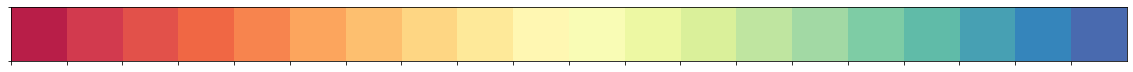

In [1]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import MaxNLocator
import squarify
import textwrap3
from textwrap3 import wrap
import random2


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

pal = sns.color_palette("Spectral", 20)
customPalette = pal.as_hex()
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [2]:
analysis = '/work/projects/ecosystem_biology/archaea/coevolution/analysis'
pics = '/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics'

In [3]:
unique_gut = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/unique_gut_proteins.csv')

all_archaea_proteins = pd.read_csv(analysis+'/intermediate_results/all_archaea_proteins.csv')

not_unique_gut = all_archaea_proteins[~all_archaea_proteins.protein.isin(unique_gut.protein)]


In [4]:
unique_gut.shape[0], all_archaea_proteins.shape[0], not_unique_gut.shape[0]

(707754, 7532646, 6824892)

In [5]:
# unique_gut = unique_gut[unique_gut['count']!=1]

## pfam - unique protein families

In [6]:
# ### Loop the data lines
# with open("/work/projects/archaeome/coevolution/pfam_annotation_archaea.tsv", 'r') as temp_f:
#     # get No of columns in each line
#     col_count = [ len(l.split("\t")) for l in temp_f.readlines() ]

# ### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
# column_names = [i for i in range(0, max(col_count))]

# ### Read csv
# df = pd.read_csv("/work/projects/archaeome/coevolution/pfam_annotation_archaea.tsv", delimiter="\t", names=column_names)
# df.dropna(axis=1, how='all', inplace=True)
# df.columns=['protein', 'id', 'description']
# pfam = df



# annotation_unique_gut = unique_gut.merge(pfam, on='protein')[['protein','cluster','id','description']]
# annotation_not_unique_gut = not_unique_gut.merge(pfam, on='protein')[['protein','cluster','id','description']]

# annotation_not_unique_gut = annotation_not_unique_gut.query("id != description")
# annotation_unique_gut = annotation_unique_gut.query("id != description")


# tmp1 = annotation_unique_gut.groupby('cluster', as_index=False)\
# .agg({'protein':'count'})\
# .rename(columns={'protein':'count'})

# annotation_unique_gut = annotation_unique_gut.merge(tmp1, on='cluster')

# tmp2 = annotation_not_unique_gut.groupby('cluster', as_index=False)\
# .agg({'protein':'count'})\
# .rename(columns={'protein':'count'})

# annotation_not_unique_gut = annotation_not_unique_gut.merge(tmp2, on='cluster')



# # List of Pfam ids in GUT and NOT GUT proteins:
# ids_gut = pd.DataFrame(annotation_unique_gut.id.unique(), columns=['id'])
# ids_not_gut = pd.DataFrame(annotation_not_unique_gut.id.unique(), columns=['id'])
# ids_gut.shape[0], ids_not_gut.shape[0]

# # Protein families present only in GUT:
# gut_functions = annotation_unique_gut.merge(ids_gut[~ids_gut.id.isin(ids_not_gut.id)])


# gut_functions_count = gut_functions.groupby('cluster', as_index=False)\
# .agg({'protein':'count'})\
# .rename(columns={'protein':'count'})\
# .sort_values('count', ascending=False)


# gut_functions = gut_functions.merge(gut_functions_count, on='cluster')

# # In some clusters separate proteins have "falling out" annotations, i.e.:
# annotation_unique_gut[annotation_unique_gut.cluster==62938]\
# .groupby(['id', 'description'])\
# .agg({'protein':'count'})

# gut_functions.to_csv(analysis+'/intermediate_results/pfam_unique_gut_functions_annotation.csv', 
#                                                            sep='\t', index=False)

# gut_functions[['protein', 'cluster', 'id', 'description','count_y']]\
# .sort_values('count_y', ascending=False)\
# .groupby(['id', 'description'], as_index=False)\
# .agg({'protein':'count'})\
# .rename(columns={'protein':'count'})\
# .sort_values(['count', 'id'], ascending=[False, False])\
# .to_csv(analysis+'/intermediate_results/pfam_unique_gut_functions.csv', 
#                                                                sep='\t', index=False)

## kegg - unique functions

In [7]:
### Loop the data lines
with open("/work/projects/archaeome/coevolution/annotation_archaea/archaea_annot_kegg.tsv", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split("\t")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
df = pd.read_csv("/work/projects/archaeome/coevolution/annotation_archaea/archaea_annot_kegg.tsv", delimiter="\t", names=column_names)
df.dropna(axis=1, how='all', inplace=True)
df.columns=['protein', 'id', 'description']
kegg = df.iloc[1:]

In [8]:
annotation_unique_gut = unique_gut.merge(kegg, on='protein')[['protein','cluster','id','description']]
annotation_not_unique_gut = not_unique_gut.merge(kegg, on='protein')[['protein','cluster','id','description']]

annotation_not_unique_gut = annotation_not_unique_gut.query("id != description")
annotation_unique_gut = annotation_unique_gut.query("id != description")


tmp1 = annotation_unique_gut.groupby('cluster', as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'count'})

annotation_unique_gut = annotation_unique_gut.merge(tmp1, on='cluster')

tmp2 = annotation_not_unique_gut.groupby('cluster', as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'count'})

annotation_not_unique_gut = annotation_not_unique_gut.merge(tmp2, on='cluster')


# List of KEGG ids in GUT and NOT GUT proteins:
ids_gut = pd.DataFrame(annotation_unique_gut.id.unique(), columns=['id'])
ids_not_gut = pd.DataFrame(annotation_not_unique_gut.id.unique(), columns=['id'])
ids_gut.shape[0], ids_not_gut.shape[0]


# Protein families present only in GUT:
gut_functions = annotation_unique_gut.merge(ids_gut[~ids_gut.id.isin(ids_not_gut.id)])


gut_functions_count = gut_functions.groupby('cluster', as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'count'})\
.sort_values('count', ascending=False)


gut_functions = gut_functions.merge(gut_functions_count, on='cluster')

# kepp only clusters where >=2 proteins are annotated
gut_functions = gut_functions[gut_functions['count_y']!=1]

gut_functions.to_csv(analysis+'/intermediate_results/archaea_kegg_unique_gut_functions_annotation.csv', 
                                                           sep='\t', index=False)

gut_functions[['protein', 'cluster', 'id', 'description','count_y']]\
.sort_values('count_y', ascending=False)\
.groupby(['id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'count'})\
.sort_values(['count', 'id'], ascending=[False, False])\
.to_csv(analysis+'/intermediate_results/archaea_kegg_unique_gut_functions.csv', 
                                                               sep='\t', index=False)

protein  cluster      id  \
0      GUT_GENOME139173.fasta_357   135737  K12706   
1      GUT_GENOME105868.fasta_196   135737  K12706   
2      GUT_GENOME104819.fasta_673   135737  K12706   
3      GUT_GENOME048336.fasta_939   135737  K12706   
4      GUT_GENOME280278.fasta_484   135737  K12706   
...                           ...      ...     ...   
1615   GUT_GENOME140888.fasta_878   119654  K04402   
1617   GUT_GENOME158288.fasta_792   128310  K22340   
1618   GUT_GENOME029030.fasta_787   128310  K22340   
1619  GUT_GENOME247693.fasta_1138    14361  K10171   
1620  GUT_GENOME015317.fasta_1754    14361  K10171   

                                            description  count_x  count_y  
0                  novobiocin biosynthesis protein NovC       21       16  
1                  novobiocin biosynthesis protein NovC       21       16  
2                  novobiocin biosynthesis protein NovC       21       16  
3                  novobiocin biosynthesis protein NovC       21       16  
4                  novobiocin biosynthesis protein NovC       21       16  
...                                                 ...      ...      ...  
1615     growth arrest and DNA-damage-inducible protein        2        2  
1617  formate dehydrogenase (NAD+, ferredoxin) subun...        2        2  
1618  formate dehydrogenase (NAD+, ferredoxin) subun...        2        2  
1619                              toll-like receptor 10        2        2  
1620                              toll-like receptor 10        2        2  

[1347 rows x 6 columns]

In [7]:
gut_functions[gut_functions['count_y']!=1].cluster.nunique()

175


## EC - unique reactions


In [ ]:
### Loop the data lines
with open("/work/projects/archaeome/coevolution/ec_annotation_archaea.tsv", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split("\t")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
df = pd.read_csv("/work/projects/archaeome/coevolution/ec_annotation_archaea.tsv", delimiter="\t", names=column_names)
df.dropna(axis=1, how='all', inplace=True)
df.columns=['protein', 'id', 'description']
ec = df



annotation_unique_gut = unique_gut.merge(ec, on='protein')[['protein','cluster','id','description']]
annotation_not_unique_gut = not_unique_gut.merge(ec, on='protein')[['protein','cluster','id','description']]

annotation_not_unique_gut = annotation_not_unique_gut.query("id != description")
annotation_unique_gut = annotation_unique_gut.query("id != description")


tmp1 = annotation_unique_gut.groupby('cluster', as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'count'})

annotation_unique_gut = annotation_unique_gut.merge(tmp1, on='cluster')

tmp2 = annotation_not_unique_gut.groupby('cluster', as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'count'})

annotation_not_unique_gut = annotation_not_unique_gut.merge(tmp2, on='cluster')


unique_ids_description_gut = annotation_unique_gut[~annotation_unique_gut.description.isin(annotation_not_unique_gut.description)]
unique_ids_description_gut = unique_ids_description_gut[~unique_ids_description_gut.id.isin(annotation_not_unique_gut.id)]


gut_functions = unique_ids_description_gut


gut_functions_count = gut_functions.groupby('cluster', as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'count'})\
.sort_values('count', ascending=False)


gut_functions = gut_functions.merge(gut_functions_count, on='cluster')

gut_functions.to_csv(analysis+'/intermediate_results/ec_unique_gut_functions_annotation.csv', 
                                                           sep='\t', index=False)

gut_functions[['protein', 'cluster', 'id', 'description','count_y']]\
.sort_values('count_y', ascending=False)\
.groupby(['id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'count'})\
.sort_values(['count', 'id'], ascending=[False, False])\
.to_csv(analysis+'/intermediate_results/ec_unique_gut_functions.csv', 
                                                               sep='\t', index=False)

# Add taxonomic resolution to function enrichment in gut

In [8]:
annot = pd.read_csv(analysis+'/intermediate_results/kegg_unique_gut_functions_annotation.csv', sep='\t')
annot['protein'] = annot['protein'].astype(str)

In [9]:
tax_gem = pd.read_csv('/scratch/users/pnovikova/archaea/data/gem/taxonomy/gem_taxonomy.tsv', 
            sep='\t', header=None, 
            names = ['genome', 'superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species'])

tax_gut = pd.read_csv('/scratch/users/pnovikova/archaea/data/gut/taxonomy/gut_taxonomy.tsv',
           sep='\t', header=None, 
            names = ['genome', 'superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species'])
# tax_gut['genome'] = tax_gut['genome'] + str('.fasta')

tax_ncbi = pd.read_csv('/scratch/users/pnovikova/archaea/data/ncbi/taxonomy/ncbi_taxonomy_lineage.tsv',
           sep='\t', 
           names = ['genome', 'superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'strain'])
tax_ncbi = tax_ncbi.iloc[1:]


In [10]:
tax = pd.concat([tax_gut, tax_gem])

In [11]:
# protein2genome = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/proteins_in_genomes.tsv',
#            sep='\t')
# protein2genome['protein'] = protein2genome['protein'].astype(str)
# protein2genome.head()


In [12]:
df1 = tax
df2 = annot

r = '({})'.format('|'.join(df1.genome))

merge_df = df2.protein.str.extract(r, expand=False).fillna(df2.protein)

annot_tax= df1.merge(df2, 
          left_on='genome', 
          right_on=merge_df, 
          how='inner')


In [13]:
annot_tax.columns

Index(['genome', 'superkingdom', 'phylum', 'class', 'order', 'family', 'genus',
       'species', 'protein', 'cluster', 'id', 'description', 'count_x',
       'count_y'],
      dtype='object')

In [28]:
annot_tax = annot_tax[annot_tax.genus!='Methanobrevibacter_A'][['protein', 'cluster', 'id', 'description',  'genus',
       'species']].sort_values('protein')

annot_tax.groupby(['id', 'description', 'genus', 'species'], as_index=False)\
.agg({'protein':'count'})\
.sort_values('protein', ascending=False)\
# .to_csv(analysis+'/intermediate_results/archaea_kegg_unique_gut_functions_annotation_plus_taxonomy.csv', sep='\t')

id                                        description  \
5   K02734                      20S proteasome subunit beta 4   
26  K14171                    alkyl hydroperoxide reductase 1   
44  K23128                         HBV large envelope protein   
28  K14813                               metalloprotease ARX1   
6   K04402     growth arrest and DNA-damage-inducible protein   
29  K15432                                             ashwin   
40  K21372                  chalcone 4'-O-glucosyltransferase   
18  K11482                           histone deacetylase HOS1   
34  K18610                                4-pyridoxolactonase   
27  K14381                                     sequestosome 1   
30  K16491              StAR-related lipid transfer protein 9   
31  K17319  putative aldouronate transport system permease...   
32  K18250                      5-nitrosalicylate dioxygenase   
33  K18395                      cytochrome P450 monooxygenase   
0   K00223                    Delta24(24(1))-sterol reductase   
35  K19082  two-component system, OmpR family, response re...   
36  K19421           polysaccharide biosynthesis protein EpsC   
25  K13820           flagellar biosynthesis protein FliR/FlhB   
38  K20678                           dTDP-fucopyranose mutase   
39  K21176  benzoxazolinate moiety biosynthesis protein SgcD5   
41  K21577  glycine/sarcosine/betaine reductase complex co...   
42  K21862                       voltage-gated cation channel   
43  K22986                     G protein-coupled receptor 108   
45  K23434        HHV7 G-protein coupled receptor homolog U51   
37  K20586                                     oxidoreductase   
23  K12780     meiotic recombination protein REC8, fungi type   
24  K13380          NADH-quinone oxidoreductase subunit B/C/D   
12  K06436                         spore coat assemly protein   
2   K00601        phosphoribosylglycinamide formyltransferase   
3   K01780                                 histidine racemase   
4   K02449                         cyclin-dependent kinase 10   
7   K05150  tumor necrosis factor receptor superfamily mem...   
8   K05537                      mannosylphosphate transferase   
9   K06329                               spore coat protein F   
10  K06387                     stage II sporulation protein R   
11  K06406                     stage V sporulation protein AD   
13  K06545                                      CD163 antigen   
1   K00474                        trimethyllysine dioxygenase   
14  K09663         beta-1,6-N-acetylglucosaminyltransferase 4   
15  K10472   kelch repeat and BTB domain-containing protein 4   
16  K10636                   E3 ubiquitin-protein ligase AMFR   
17  K11091               U1 small nuclear ribonucleoprotein A   
19  K11483                           histone deacetylase HOS2   
20  K11726        nucleosome-remodeling factor 38 kDa subunit   
21  K11908       sigma-54 dependent transcriptional regulator   
22  K12590                    exosome complex component RRP46   
46  K24368                      COP9 signalosome-interactor 1   

                      genus                               species  protein  
5      Methanomethylophilus            Methanomethylophilus alvus        8  
26    Methanomassiliicoccus     Methanomassiliicoccus luminyensis        2  
44     Methanomethylophilus            Methanomethylophilus alvus        2  
28           Methanosphaera               Methanosphaera cuniculi        2  
6     Methanomassiliicoccus     Methanomassiliicoccus luminyensis        2  
29           Methanosphaera               Methanosphaera cuniculi        2  
40           Methanosphaera               Methanosphaera cuniculi        2  
18           Methanosphaera               Methanosphaera cuniculi        2  
34     Methanomethylophilus            Methanomethylophilus alvus        1  
27                Haloferax                Haloferax massiliensis        1  
30  Methanomassiliicoccus_A  Methanomass

# Check taxonomic composition in other environemnts

In [29]:
df_ak = pd.read_csv(analysis+'/intermediate_results/df_ak.csv')
df_ak

protein  cluster   origin  count
0          3300025854_5_693  1477427  not_gut      3
1        3300009029_24_1147  1477427  not_gut      3
2         3300025600_31_120  1477427  not_gut      3
3          3300025854_5_821  1477457  not_gut      4
4        3300025836_26_1471  1477457  not_gut      4
...                     ...      ...      ...    ...
7532641    3300029442_7_345  2209649  not_gut      3
7532642   3300027902_52_651  2209649  not_gut      3
7532643   3300017522_30_983  2209649  not_gut      3
7532644    3300029442_7_473  2209884  not_gut      2
7532645    3300017522_30_92  2209884  not_gut      2

[7532646 rows x 4 columns]

In [30]:
annot_not_gut = df_ak.merge(kegg, on='protein')
annot_not_gut

protein  cluster   origin  count      id  \
0          3300025854_5_821  1477457  not_gut      4  K21612   
1        3300025836_26_1471  1477457  not_gut      4  K21612   
2        3300025575_30_1236  1477457  not_gut      4  K21612   
3         3300025650_30_710  1477457  not_gut      4  K21612   
4          3300025854_5_885  1477474  not_gut     14  K06173   
...                     ...      ...      ...    ...     ...   
5942291   3300028653_12_429  2184963  not_gut      1  K01181   
5942292    3300029442_7_217  2208619  not_gut      1  K06218   
5942293    3300029442_7_345  2209649  not_gut      3  K19824   
5942294   3300027902_52_651  2209649  not_gut      3  K19824   
5942295   3300017522_30_983  2209649  not_gut      3  K19824   

                              description  
0                coenzyme F430 synthetase  
1                coenzyme F430 synthetase  
2                coenzyme F430 synthetase  
3                coenzyme F430 synthetase  
4        tRNA pseudouridine38-40 synthase  
...                                   ...  
5942291            endo-1,4-beta-xylanase  
5942292        mRNA interferase RelE/StbE  
5942293                      rubrerythrin  
5942294                      rubrerythrin  
5942295                      rubrerythrin  

[5942296 rows x 6 columns]

In [41]:
annot_not_gut\
.groupby(['id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.sort_values('protein', ascending=False).head(50)

id                                        description  protein
10706  K13735                                    adhesin/invasin    26016
6269   K07725                     CRISPR-associated protein Csa3    25074
3926   K04767                   acetoin utilization protein AcuB    19767
1604   K01990    ABC-2 type transport system ATP-binding protein    18752
5892   K07279                       autotransporter family porin    17907
7586   K09667                       protein O-GlcNAc transferase    17021
16179  K21463                   membrane-associated protein TcaA    15964
5834   K07218                  nitrous oxidase accessory protein    15570
3112   K03718  Lrp/AsnC family transcriptional regulator, reg...    15323
5759   K07133                            uncharacterized protein    14115
6073   K07496                               putative transposase    11701
2629   K03183  demethylmenaquinone methyltransferase / 2-meth...    11653
13517  K17830      digeranylgeranylglycerophospholipid reductase    11598
17599  K23356  HTH-type transcriptional regulator, sugar sens...    11145
6834   K08482                       circadian clock protein KaiC    10672
3385   K04034  anaerobic magnesium-protoporphyrin IX monometh...    10513
6266   K07722  CopG family transcriptional regulator, nickel-...    10484
18002  K23976  L-aspartate semialdehyde sulfurtransferase fer...    10448
4919   K06149                         universal stress protein A    10441
2578   K03124              transcription initiation factor TFIIB    10234
5941   K07333                    archaeal flagellar protein FlaJ    10033
10540  K13525          transitional endoplasmic reticulum ATPase     9978
8420   K10725           archaeal cell division control protein 6     9934
16924  K22447                                archaeal chaperonin     9836
3922   K04763                         integrase/recombinase XerD     9792
10132  K12960  5-methylthioadenosine/S-adenosylhomocysteine d...     9512
5689   K07060                              endoribonuclease Nob1     9476
6561   K08153  MFS transporter, DHA1 family, multidrug resist...     9457
5549   K06915                            uncharacterized protein     9448
3180   K03789  [ribosomal protein S18]-alanine N-acetyltransf...     9195
5144   K06402                    stage IV sporulation protein FB     8881
3415   K04069           pyruvate formate lyase activating enzyme     8579
5681   K07052                            uncharacterized protein     8509
1579   K01951               GMP synthase (glutamine-hydrolysing)     8424
10910  K13993                               HSP20 family protein     8374
17518  K23255       archaeal type IV pilus assembly protein PilA     8288
5940   K07332                    archaeal flagellar protein FlaI     8234
5806   K07182                      CBS domain-containing protein     8233
1651   K02039                 phosphate transport system protein     8049
14585  K19286                            FMN reductase [NAD(P)H]     8039
2524   K03057                             transcription factor S     7902
1630   K02016  iron complex transport system substrate-bindin...     7831
3113   K03719  Lrp/AsnC family transcriptional regulator, leu...     7743
647    K00812                         aspartate aminotransferase     7562
1879   K02319                       DNA polymerase, archaea type     7552
5705   K07076                            uncharacterized protein     7523
1617   K02003  putative ABC transport system ATP-binding protein     7489
5555   K06921                            uncharacterized protein     7342
8593   K10947  PadR family transcriptional regulator, regulat...     7308
17109  K22708  poly(ribitol-phosphate) beta-N-acetylglucosami...     7284

In [45]:
df1 = tax
df2 = annot_not_gut

r = '({})'.format('|'.join(df1.genome))

merge_df = df2.protein.str.extract(r, expand=False).fillna(df2.protein)

annot_not_gut_tax= df1.merge(df2, 
          left_on='genome', 
          right_on=merge_df, 
          how='inner')



In [46]:
annot_not_gut_tax.columns

Index(['genome', 'superkingdom', 'phylum', 'class', 'order', 'family', 'genus',
       'species', 'protein', 'cluster', 'origin', 'count', 'id',
       'description'],
      dtype='object')

In [47]:
annot_not_gut_tax = annot_not_gut_tax[['protein', 'cluster', 'id', 'description', 'class', 'order', 'family', 'genus',
       'species']].sort_values('protein')

annot_not_gut_tax.groupby(['id', 'cluster', 'description', 'genus', 'species'], as_index=False)\
.agg({'protein':'count'})\
.sort_values('protein', ascending=False).head(50)

id  cluster                                        description  \
9939    K00171  2949158   pyruvate ferredoxin oxidoreductase delta subunit   
164353  K02910  2787167               large subunit ribosomal protein L31e   
294695  K06875  2839123                    programmed cell death protein 5   
480834  K14117  2827451          energy-converting hydrogenase B subunit H   
480774  K14116  2788348          energy-converting hydrogenase B subunit G   
165188  K02924   594286               large subunit ribosomal protein L39e   
75575   K01523  2217304            phosphoribosyl-ATP pyrophosphohydrolase   
167685  K02944  2956091                 large subunit ribosomal protein LX   
89047   K01726  2798962                           gamma-carbonic anhydrase   
164092  K02908  2917950               large subunit ribosomal protein L30e   
481082  K14121  2918098          energy-converting hydrogenase B subunit L   
158137  K02823   287004  dihydroorotate dehydrogenase electron transfer...   
249241  K04069  2833365           pyruvate formate lyase activating enzyme   
88184   K01714  2901675          4-hydroxy-tetrahydrodipicolinate synthase   
170098  K02966  2907618               small subunit ribosomal protein S19e   
571575  K21947  2206603         tRNA-5-methyluridine54 2-sulfurtransferase   
92671   K01778  2926593                          diaminopimelate epimerase   
604488  K24410  2787166                                       TfuA protein   
9368    K00169  2838016   pyruvate ferredoxin oxidoreductase alpha subunit   
240742  K03789  2201606  [ribosomal protein S18]-alanine N-acetyltransf...   
480876  K14118  2201608          energy-converting hydrogenase B subunit I   
128726  K02040  2787790  phosphate transport system substrate-binding p...   
480924  K14119  2787132          energy-converting hydrogenase B subunit J   
138508  K02233  2943788         adenosylcobinamide-GDP ribazoletransferase   
554271  K20156  2822816            2-amino-4-deoxychorismate dehydrogenase   
83183   K01653  2941980          acetolactate synthase I/III small subunit   
260803  K04767  2790829                   acetoin utilization protein AcuB   
193531  K03264  2216858                    translation initiation factor 6   
554295  K20156  2873772            2-amino-4-deoxychorismate dehydrogenase   
481121  K14122  2854671          energy-converting hydrogenase B subunit M   
300403  K06920  2201718                    7-cyano-7-deazaguanine synthase   
187566  K03181  2983735                                   chorismate lyase   
10145   K00172  2787732   pyruvate ferredoxin oxidoreductase gamma subunit   
573937  K22082  2909549  methylamine---glutamate N-methyltransferase su...   
200445  K03365  2786118                      cytosine/creatinine deaminase   
153471  K02585  2786496                     nitrogen fixation protein NifB   
243320  K03839  2820112                                       flavodoxin I   
253107  K04483  2868513                            DNA repair protein RadA   
260956  K04767  2915103                   acetoin utilization protein AcuB   
151051  K02501  2919560  imidazole glycerol-phosphate synthase subunit ...   
221017  K03622  2795427               archaea-specific DNA-binding protein   
511939  K16793  2813724             methanogen homoaconitase small subunit   
306593  K06950  2920361                            uncharacterized protein   
217202  K03569  2795539  rod shape-determining protein MreB and related...   
95550   K01821  2808363                       4-oxalocrotonate tautomerase   
323385  K07079  2854892                            uncharacterized protein   
12886   K00196  2840537  anaerobic carbon-monoxide dehydrogenase iron s...   
573753  K22081  3017919  methylamine---glutamate N-methyltransferase su...   
10973   K00175  2907197  2-oxoglutarate/2-oxoacid ferredoxin oxidoreduc...   
306128  K06944  2840380                            uncharacterized protein   

                       genus     

# a lot of methanobrevibacter 👆